In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("USA_Housing.csv")

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
X=df.iloc[:,1].values

In [19]:
X

array([5.68286132, 6.00289981, 5.86588984, ..., 7.25059061, 5.53438842,
       5.99230531])

In [20]:
y=df.iloc[:,5].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=52)

In [46]:
class Mylr:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+(X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
            den=den+(X_train[i]-X_train.mean())**2
        self.m=num/den
        self.b=y_train.mean()-(self.m*X_train.mean())
    def predict(self,X_test):
        a=[]
        for i in range(X_test.shape[0]):
             a.append((self.m*X_test[i]+self.m))
        return a

In [47]:
lr=Mylr()

In [48]:
lr.fit(X_train,y_train)

In [49]:
y_pred=lr.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [51]:
mean_absolute_error(y_test,y_pred)

268903.30452434724

In [52]:
from sklearn.linear_model import LinearRegression
Meralr=LinearRegression()
Meralr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
y_pred=Meralr.predict(X_test.reshape(-1,1))

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

250320.44709255878

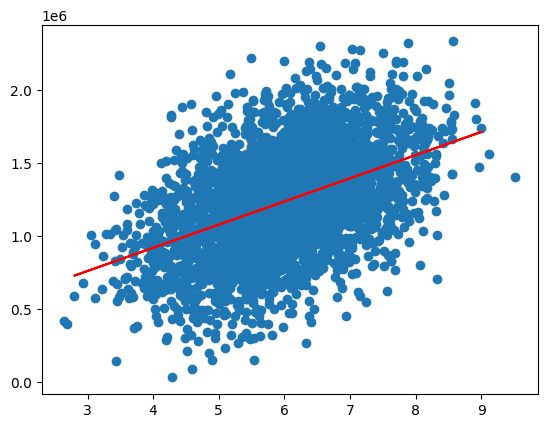

In [56]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,'r')

In [91]:
class Mlr:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.b=betas[0]
        self.m=betas[1:]
    def predict(self,X_test):
        y_pred=np.dot(X_test,self.m)+self.b
        return y_pred

In [92]:
lr.b

284769.5152521436

In [93]:
lr.m

158448.2582997166

In [94]:
Meralr.coef_

array([[158448.25829972]])

In [95]:
Meralr.intercept_

array([284769.51525214])

In [96]:
Mulr=Mlr()

In [97]:
X=df.iloc[:,0:5].values
y=df.loc[:,['Price']].values
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=52)

In [99]:
Mulr.fit(X_train,y_train)

In [100]:
y_pred=Mulr.predict(X_test)

In [101]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("MSE = ",mean_squared_error(y_test,y_pred))
print("R2 score = ",r2_score(y_test,y_pred))
print("RSE = ",mean_squared_error(y_test,y_pred)**0.5)

MAE =  85267.55459688065
MSE =  11152883750.422747
R2 score =  0.9105715263926233
RSE =  105607.21448093756
